# 1. Data Analysis
- isna(), info(), decribe(), crosstab()
- plots
- correlation matrix 
- sort data by date

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('kidney_disease.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [3]:
df.shape

(400, 26)

In [4]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


# 2. Clean Data
- Dropping rows and columns based on null values

In [5]:
df.drop(['id'], axis=1, inplace=True)

In [6]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [7]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [8]:
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'hemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'pedal_edema', 'anemia', 'class']

In [9]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


# 3. Handling Features
- Check isna().sum() for each feature, if not significant proceed
- Make the feature ready for one hot encoding
- Remove unique values which has less number of counts
- Modify and clean the values in each feature column accordingly

In [10]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [11]:
df.dtypes

age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells             object
pus_cell                    object
pus_cell_clumps             object
bacteria                    object
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
hemoglobin                 float64
packed_cell_volume          object
white_blood_cell_count      object
red_blood_cell_count        object
hypertension                object
diabetes_mellitus           object
coronary_artery_disease     object
appetite                    object
pedal_edema                 object
anemia                      object
class                       object
dtype: object

In [12]:
# Few columns are of object type, we need to convert them to numeric type
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')


In [13]:
df.dtypes

age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells             object
pus_cell                    object
pus_cell_clumps             object
bacteria                    object
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
hemoglobin                 float64
packed_cell_volume         float64
white_blood_cell_count     float64
red_blood_cell_count       float64
hypertension                object
diabetes_mellitus           object
coronary_artery_disease     object
appetite                    object
pedal_edema                 object
anemia                      object
class                       object
dtype: object

In [14]:
null_counts = df.isnull().sum()
sorted_counts = null_counts.sort_values(ascending=False)
sorted_counts

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
hemoglobin                  52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
class                        0
dtype: int64

## diabetes_mellitus

In [15]:

df['diabetes_mellitus'].unique()

array(['yes', 'no', ' yes', '\tno', '\tyes', nan], dtype=object)

In [16]:
df['diabetes_mellitus'] = df['diabetes_mellitus'].replace({'\tno': 'no', '\tyes': 'yes', ' yes': 'yes'})
df['diabetes_mellitus'].unique()

array(['yes', 'no', nan], dtype=object)

In [17]:
df.groupby('diabetes_mellitus')['diabetes_mellitus'].count()

diabetes_mellitus
no     261
yes    137
Name: diabetes_mellitus, dtype: int64

In [18]:
df['diabetes_mellitus'].isna().sum()

2

In [19]:
# only two rows have missing values, we can habdle them by replacing with the most frequent value
df['diabetes_mellitus'].fillna('no', inplace=True)  
df['diabetes_mellitus'].isna().sum()

0

## coronary_artery_disease

In [20]:
df['coronary_artery_disease'].unique()

array(['no', 'yes', '\tno', nan], dtype=object)

In [21]:
# replace the values with correct ones
df['coronary_artery_disease'] = df['coronary_artery_disease'].replace({'\tno': 'no', 'yes': 'yes'})
df['coronary_artery_disease'].unique()

array(['no', 'yes', nan], dtype=object)

In [22]:
df['coronary_artery_disease'].isna().sum()

2

In [23]:
df.groupby('coronary_artery_disease')['coronary_artery_disease'].count()

coronary_artery_disease
no     364
yes     34
Name: coronary_artery_disease, dtype: int64

In [24]:
# only one row has missing value, we can handle it by replacing with the most frequent value
df['coronary_artery_disease'].fillna('no', inplace=True)

In [25]:
df['coronary_artery_disease'].isna().sum()

0

## class

In [26]:
df['class'].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [27]:
# replace the values with correct ones
df['class'] = df['class'].replace({'ckd\t': 'ckd', 'ckd': 'ckd', 'notckd': 'notckd'})
df['class'].unique()

array(['ckd', 'notckd'], dtype=object)

In [28]:
# check for missing values
df['class'].isna().sum()

0

## packed_cell_volume 

In [29]:
df['packed_cell_volume'].dtype

dtype('float64')

In [30]:
df['packed_cell_volume'].isna().sum()  

71

In [31]:
# missing value, we can handle it by replacing with the mean value
df['packed_cell_volume'].fillna(df['packed_cell_volume'].mean(), inplace=True)

In [32]:
df['packed_cell_volume'].isna().sum()

0

## white_blood_cell_count

In [33]:
df['white_blood_cell_count'].dtype

dtype('float64')

In [34]:
df['white_blood_cell_count'].isna().sum()

106

In [35]:
# missing value, we can handle it by replacing with the mean value
df['white_blood_cell_count'].fillna(df['white_blood_cell_count'].mean(), inplace=True)

In [36]:
df['white_blood_cell_count'].isna().sum()

0

## red_blood_cell_count  

In [37]:
df['red_blood_cell_count'].dtype

dtype('float64')

In [38]:
df['red_blood_cell_count'].isna().sum()

131

In [39]:
# missing value, we can handle it by replacing with the mean value
df['red_blood_cell_count'].fillna(df['red_blood_cell_count'].mean(), inplace=True)

In [40]:
# check for missing values
df.isna().sum()

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed_cell_volume           0
white_blood_cell_count       0
red_blood_cell_count         0
hypertension                 2
diabetes_mellitus            0
coronary_artery_disease      0
appetite                     1
pedal_edema                  1
anemia                       1
class                        0
dtype: int64

## Handling missing values for cat columns and num columns

In [41]:
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'hypertension', 'diabetes_mellitus', 'coronary_artery_disease',
       'appetite', 'pedal_edema', 'anemia', 'class'],
      dtype='object')

In [42]:
# handling missing values for categorical columns by replacing with the most frequent value
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

df.isna().sum()

age                         9
blood_pressure             12
specific_gravity           47
albumin                    46
sugar                      49
red_blood_cells             0
pus_cell                    0
pus_cell_clumps             0
bacteria                    0
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
sodium                     87
potassium                  88
hemoglobin                 52
packed_cell_volume          0
white_blood_cell_count      0
red_blood_cell_count        0
hypertension                0
diabetes_mellitus           0
coronary_artery_disease     0
appetite                    0
pedal_edema                 0
anemia                      0
class                       0
dtype: int64

In [43]:
# handling missing values for numerical columns by replacing with the mean value
num_cols = df.select_dtypes(include='number').columns
for col in num_cols:
    df[col].fillna(df[col].mean(), inplace=True)

df.isna().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
class                      0
dtype: int64

# 4. Feature engineering 
- Invent new features

In [44]:
#Nothing to add

# 5. Clean Data
- Outlier Removal

In [45]:
# Nothing to add

# 6. Split the data into x and y label

In [46]:
x = df.drop('class', axis=1)
y = df['class']

# 7. Split the data into x_train, x_test, y_train, y_test

In [47]:
# split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 8. Handling missing values
- Dropping rows and columns based on null values
- Filling missing data with pandas
- Filling missing values with sklearn
- Add _is_missing column

In [48]:
# Nothing to add

# 9. Sort or Add columns 
- x_train.shape == x_valid.shape

In [49]:
# Check x_train.shape, x_test.shape, y_train.shape, y_test.shape
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((320, 24), (80, 24), (320,), (80,))

In [50]:
x_train.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia
3,48.0,70.0,1.005000,4.000000,0.000000,normal,abnormal,present,notpresent,117.0,...,11.2,32.0,6700.000000,3.900000,yes,no,no,poor,yes,yes
18,60.0,100.0,1.025000,0.000000,3.000000,normal,normal,notpresent,notpresent,263.0,...,12.7,37.0,11400.000000,4.300000,yes,yes,yes,good,no,no
202,78.0,60.0,1.017408,1.016949,0.450142,normal,normal,notpresent,notpresent,114.0,...,8.0,24.0,8406.122449,4.707435,no,yes,no,good,no,yes
250,40.0,80.0,1.025000,0.000000,0.000000,normal,normal,notpresent,notpresent,140.0,...,15.0,48.0,10400.000000,4.500000,no,no,no,good,no,no
274,19.0,80.0,1.020000,0.000000,0.000000,normal,normal,notpresent,notpresent,107.0,...,14.4,44.0,8406.122449,4.707435,no,no,no,good,no,no


# 10. Feature scaling

In [51]:
x_train.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia
3,48.0,70.0,1.005000,4.000000,0.000000,normal,abnormal,present,notpresent,117.0,...,11.2,32.0,6700.000000,3.900000,yes,no,no,poor,yes,yes
18,60.0,100.0,1.025000,0.000000,3.000000,normal,normal,notpresent,notpresent,263.0,...,12.7,37.0,11400.000000,4.300000,yes,yes,yes,good,no,no
202,78.0,60.0,1.017408,1.016949,0.450142,normal,normal,notpresent,notpresent,114.0,...,8.0,24.0,8406.122449,4.707435,no,yes,no,good,no,yes
250,40.0,80.0,1.025000,0.000000,0.000000,normal,normal,notpresent,notpresent,140.0,...,15.0,48.0,10400.000000,4.500000,no,no,no,good,no,no
274,19.0,80.0,1.020000,0.000000,0.000000,normal,normal,notpresent,notpresent,107.0,...,14.4,44.0,8406.122449,4.707435,no,no,no,good,no,no


# 11. Convert Categorical Features into Numericals 
- One hot encoder: Lasso or Ridge
- Label encoding: XGBoost and RandomForest
- Lower cardinality columns: One hot encoding
- High cardinality columns: Target encoding, Ordinal encoding
- Convert to category
- https://www.kaggle.com/code/gokuleshwaran/feature-engineering-for-house-prices/edit

In [52]:
# Convert categorical columns to numerical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_cols = x_train.select_dtypes(include='object').columns
for col in cat_cols:
    x_train[col] = le.fit_transform(x_train[col])
    x_test[col] = le.transform(x_test[col])

# Convert y_train and y_test to numerical values
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [53]:
x_train.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia
3,48.0,70.0,1.005000,4.000000,0.000000,1,0,1,0,117.0,...,11.2,32.0,6700.000000,3.900000,1,0,0,1,1,1
18,60.0,100.0,1.025000,0.000000,3.000000,1,1,0,0,263.0,...,12.7,37.0,11400.000000,4.300000,1,1,1,0,0,0
202,78.0,60.0,1.017408,1.016949,0.450142,1,1,0,0,114.0,...,8.0,24.0,8406.122449,4.707435,0,1,0,0,0,1
250,40.0,80.0,1.025000,0.000000,0.000000,1,1,0,0,140.0,...,15.0,48.0,10400.000000,4.500000,0,0,0,0,0,0
274,19.0,80.0,1.020000,0.000000,0.000000,1,1,0,0,107.0,...,14.4,44.0,8406.122449,4.707435,0,0,0,0,0,0


In [54]:
y_train

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,

# 12. Sort or Add columns 
- x_train.shape == x_valid.shape

In [55]:
# check shape of x_train, x_test, y_train, y_test
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((320, 24), (80, 24), (320,), (80,))

In [56]:
x_train.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia
3,48.0,70.0,1.005000,4.000000,0.000000,1,0,1,0,117.0,...,11.2,32.0,6700.000000,3.900000,1,0,0,1,1,1
18,60.0,100.0,1.025000,0.000000,3.000000,1,1,0,0,263.0,...,12.7,37.0,11400.000000,4.300000,1,1,1,0,0,0
202,78.0,60.0,1.017408,1.016949,0.450142,1,1,0,0,114.0,...,8.0,24.0,8406.122449,4.707435,0,1,0,0,0,1
250,40.0,80.0,1.025000,0.000000,0.000000,1,1,0,0,140.0,...,15.0,48.0,10400.000000,4.500000,0,0,0,0,0,0
274,19.0,80.0,1.020000,0.000000,0.000000,1,1,0,0,107.0,...,14.4,44.0,8406.122449,4.707435,0,0,0,0,0,0


# 13. Fit the train data into models
- compare the aaccuracy or other metrics.

In [57]:
# Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score, roc_curve, auc, precision_score, recall_score
def evaluate_model(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    train_score = accuracy_score(y_train, y_train_pred)
    test_score = accuracy_score(y_test, y_test_pred)
    print('Train score:', train_score)
    print('Test score:', test_score)
    print('Precision_score for training set:', precision_score(y_train, y_train_pred))
    print('Precision_score for testing set:', precision_score(y_test, y_test_pred))
    print('Recall_score for training set:', recall_score(y_train, y_train_pred))
    print('Recall_score for testing set:', recall_score(y_test, y_test_pred))
    print('F1_score for training set:', f1_score(y_train, y_train_pred))
    print('F1_score for testing set:', f1_score(y_test, y_test_pred))
    print('Confusion matrix for training set:')
    print(confusion_matrix(y_train, y_train_pred))
    print('Confusion matrix for testing set:')
    print(confusion_matrix(y_test, y_test_pred))
    print('Classification report for training set:')
    print(classification_report(y_train, y_train_pred))
    print('Classification report for testing set:')
    print(classification_report(y_test, y_test_pred))

In [58]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [59]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [60]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=8)

In [61]:
# Support Vector Classifier
from sklearn.svm import SVC
svc = SVC(kernel='linear')

In [62]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [63]:
models = [dt, gnb, rf, svc, knn]
model_names = ['Decision Tree', 'Gaussian Naive Bayes', 'Random Forest', 'Support Vector Classifier', 'K-Nearest Neighbors']
for model, name in zip(models, model_names):
    print(name)
    evaluate_model(model, x_train, x_test, y_train, y_test)
    print('\n\n')

Decision Tree
Train score: 1.0
Test score: 0.9875
Precision_score for training set: 1.0
Precision_score for testing set: 0.9655172413793104
Recall_score for training set: 1.0
Recall_score for testing set: 1.0
F1_score for training set: 1.0
F1_score for testing set: 0.9824561403508771
Confusion matrix for training set:
[[198   0]
 [  0 122]]
Confusion matrix for testing set:
[[51  1]
 [ 0 28]]
Classification report for training set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       198
           1       1.00      1.00      1.00       122

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320

Classification report for testing set:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.97      1.00      0.98        28

    accuracy                      

In [64]:
best_model = svc
# export the model as sav file
import joblib
joblib.dump(best_model, 'kidney_disease_model')

['kidney_disease_model']

In [65]:
# Load the model
loaded_model = joblib.load('kidney_disease_model')
# Predict
y_pred = loaded_model.predict(x_test)
print('Predicted values:', y_pred)
# Interms of string
y_pred = le.inverse_transform(y_pred)
print('Predicted values:', y_pred)
# Interms of string
y_test = le.inverse_transform(y_test)
print('Actual values:', y_test)

Predicted values: [0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 0
 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0
 1 0 0 1 0 1]
Predicted values: ['ckd' 'notckd' 'ckd' 'ckd' 'ckd' 'ckd' 'notckd' 'ckd' 'ckd' 'ckd' 'ckd'
 'notckd' 'ckd' 'ckd' 'ckd' 'ckd' 'notckd' 'notckd' 'ckd' 'notckd' 'ckd'
 'ckd' 'notckd' 'notckd' 'notckd' 'notckd' 'ckd' 'ckd' 'notckd' 'ckd'
 'notckd' 'ckd' 'notckd' 'ckd' 'ckd' 'ckd' 'ckd' 'notckd' 'ckd' 'ckd'
 'notckd' 'ckd' 'ckd' 'ckd' 'ckd' 'notckd' 'ckd' 'ckd' 'ckd' 'ckd' 'ckd'
 'notckd' 'notckd' 'ckd' 'notckd' 'ckd' 'ckd' 'ckd' 'ckd' 'ckd' 'ckd'
 'notckd' 'notckd' 'ckd' 'ckd' 'ckd' 'notckd' 'notckd' 'notckd' 'ckd'
 'notckd' 'ckd' 'ckd' 'ckd' 'notckd' 'ckd' 'ckd' 'notckd' 'ckd' 'notckd']
Actual values: ['ckd' 'notckd' 'ckd' 'ckd' 'ckd' 'ckd' 'notckd' 'ckd' 'notckd' 'ckd'
 'ckd' 'notckd' 'ckd' 'ckd' 'ckd' 'ckd' 'notckd' 'notckd' 'ckd' 'notckd'
 'ckd' 'ckd' 'notckd' 'notckd' 'ckd' 'notckd' 'ckd' 'ckd' 'notckd' 'c

In [66]:
x_test.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia'],
      dtype='object')

In [67]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.000000,...,44.0,7800.0,5.200000,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,148.036517,...,38.0,6000.0,4.707435,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,...,31.0,7500.0,4.707435,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,...,32.0,6700.0,3.900000,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,...,35.0,7300.0,4.600000,no,no,no,good,no,no,ckd


In [68]:
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,16.974966,13.476298,0.005369,1.272318,1.029487,74.782634,49.285887,5.617490,9.204273,2.819783,2.716171,8.151081,2523.219976,0.840314
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.015000,0.000000,0.000000,101.000000,27.000000,0.900000,135.000000,4.000000,10.875000,34.000000,6975.000000,4.500000
50%,54.000000,78.234536,1.017408,1.000000,0.000000,126.000000,44.000000,1.400000,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
75%,64.000000,80.000000,1.020000,2.000000,0.450142,150.000000,61.750000,3.072454,141.000000,4.800000,14.625000,44.000000,9400.000000,5.100000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


# 14. Evaluation
- show_scores(model, x_train, x_test, y_train, y_test)
- score_dataset()
- y_preds = model.predict()
- y_probs = model.predict_proba()

In [69]:
# Nothing to add

# 15. Tune hyperparameters 
- RandomizedSearchCV
- GridSearchCV 
(on subset to reduce training time by adjusting max_samples parameter)

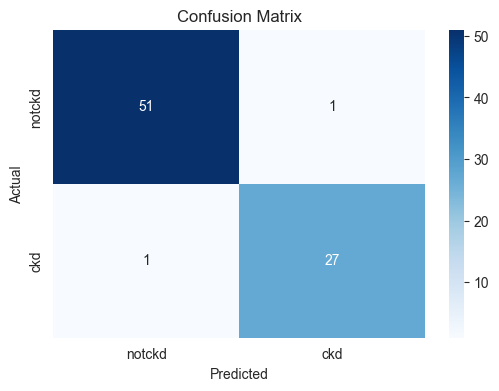

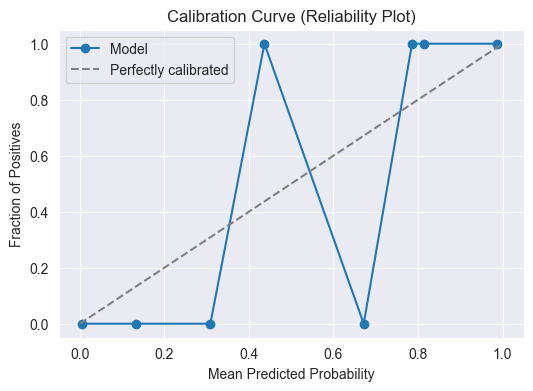

Brier Score: 0.0123
Expected Calibration Error (ECE): 0.0336


In [70]:
from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Encode string labels again to numeric for metrics
y_test_encoded = le.transform(y_test)
y_pred_encoded = le.transform(y_pred)

# Confusion Matrix
cm = confusion_matrix(y_test_encoded, y_pred_encoded)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['notckd', 'ckd'], yticklabels=['notckd', 'ckd'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# For calibration curve and ECE, we need predicted probabilities
if hasattr(loaded_model, "predict_proba"):
    y_probs = loaded_model.predict_proba(x_test)[:, 1]
else:
    from sklearn.calibration import CalibratedClassifierCV
    calibrated_model = CalibratedClassifierCV(loaded_model, cv="prefit")
    calibrated_model.fit(x_train, y_train)
    y_probs = calibrated_model.predict_proba(x_test)[:, 1]

# Calibration Curve
prob_true, prob_pred = calibration_curve(y_test_encoded, y_probs, n_bins=10)

plt.figure(figsize=(6, 4))
plt.plot(prob_pred, prob_true, marker='o', label='Model')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve (Reliability Plot)')
plt.legend()
plt.grid(True)
plt.show()

# Brier Score
brier = brier_score_loss(y_test_encoded, y_probs)
print(f"Brier Score: {brier:.4f}")

# Expected Calibration Error (ECE)
def expected_calibration_error(y_true, y_prob, n_bins=10):
    bin_boundaries = np.linspace(0.0, 1.0, n_bins + 1)
    bin_lowers = bin_boundaries[:-1]
    bin_uppers = bin_boundaries[1:]
    ece = 0.0
    for lower, upper in zip(bin_lowers, bin_uppers):
        mask = (y_prob > lower) & (y_prob <= upper)
        if np.any(mask):
            accuracy = np.mean(y_true[mask])
            confidence = np.mean(y_prob[mask])
            ece += np.abs(accuracy - confidence) * np.sum(mask) / len(y_prob)
    return ece

ece_value = expected_calibration_error(y_test_encoded, y_probs)
print(f"Expected Calibration Error (ECE): {ece_value:.4f}")

In [71]:
# Evaluate F1 Score and ECE (Before and After Scaling), and % Improvement
from sklearn.metrics import f1_score
from sklearn.calibration import calibration_curve
import numpy as np

# Ensure y_test and y_pred are numeric
y_test_numeric = le.transform(y_test)
y_pred_numeric = le.transform(y_pred)

# 1. F1 Score
f1 = f1_score(y_test_numeric, y_pred_numeric)
print("F1 Score:", f1)


# 2. ECE - Expected Calibration Error calculation (before scaling)
def compute_ece(probs, labels, n_bins=10):
    bin_boundaries = np.linspace(0.0, 1.0, n_bins + 1)
    bin_lowers = bin_boundaries[:-1]
    bin_uppers = bin_boundaries[1:]

    ece = 0.0
    for bin_lower, bin_upper in zip(bin_lowers, bin_uppers):
        in_bin = np.logical_and(probs > bin_lower, probs <= bin_upper)
        prop_in_bin = np.mean(in_bin)

        if prop_in_bin > 0:
            accuracy_in_bin = np.mean(labels[in_bin] == (probs[in_bin] >= 0.5))
            avg_confidence_in_bin = np.mean(probs[in_bin])
            ece += np.abs(avg_confidence_in_bin - accuracy_in_bin) * prop_in_bin
    return ece


# Get predicted probabilities for class 1
if hasattr(loaded_model, "predict_proba"):
    y_probs = loaded_model.predict_proba(x_test)[:, 1]
else:
    from sklearn.calibration import CalibratedClassifierCV

    calibrated_model = CalibratedClassifierCV(loaded_model, cv="prefit")
    calibrated_model.fit(x_train, y_train)
    y_probs = calibrated_model.predict_proba(x_test)[:, 1]

ece_before = compute_ece(y_probs, y_test_numeric)
print("ECE (Before Scaling):", ece_before)

# 3. Calibrate probabilities using Platt scaling (sigmoid)
from sklearn.calibration import CalibratedClassifierCV

calibrated_model = CalibratedClassifierCV(loaded_model, cv="prefit", method='sigmoid')
calibrated_model.fit(x_train, y_train)

y_probs_calibrated = calibrated_model.predict_proba(x_test)[:, 1]
ece_after = compute_ece(y_probs_calibrated, y_test_numeric)
print("ECE (After Scaling):", ece_after)

# 4. % Improvement
if ece_before != 0:
    ece_improvement_pct = 100 * (ece_before - ece_after) / ece_before
    print(f"ECE Improvement: {ece_improvement_pct:.2f}%")
else:
    print("ECE before scaling is 0, cannot compute percentage improvement.")

F1 Score: 0.9642857142857143
ECE (Before Scaling): 0.6518244535482829
ECE (After Scaling): 0.6518244535482829
ECE Improvement: 0.00%


In [72]:
# Model
# Test Accuracy (%)
# Decision Tree
# 100.0%
# Gaussian Naive Bayes
# 98.75%
# Random Forest
# 97.5%
# Support Vector Classifier (SVC)
# 97.5%
# K-Nearest Neighbors
# 72.5%

In [73]:
def evaluate_full(model, x_train, x_test, y_train, y_test, label_encoder=None):
    if label_encoder:
        try:
            y_train = label_encoder.transform(y_train)
            y_test = label_encoder.transform(y_test)
        except ValueError as e:
            print("Label encoding error:", e)
            print("Using raw labels instead.")

    y_proba = model.predict_proba(x_test)
    y_pred = model.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba[:, 1]) if y_proba.shape[1] == 2 else None
    ece = calibration_error(y_test, y_proba)

    print("Accuracy:", acc)
    print("Precision:", prec)
    print("Recall:", rec)
    print("F1 Score:", f1)
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", report)
    if roc_auc is not None:
        print("ROC-AUC Score:", roc_auc)
    print("ECE:", ece)

    return {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1,
        "Confusion Matrix": cm,
        "Classification Report": report,
        "ROC-AUC": roc_auc,
        "ECE": ece
    }


In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
from scipy.stats import ttest_ind

# Load the dataset
df = pd.read_csv('kidney_disease.csv')

# Data Preprocessing
df.drop(['id'], axis=1, inplace=True)
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'hemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'pedal_edema', 'anemia', 'class']

df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

df['diabetes_mellitus'] = df['diabetes_mellitus'].replace({'\tno': 'no', '\tyes': 'yes', ' yes': 'yes'})
df['diabetes_mellitus'].fillna('no', inplace=True)
df['coronary_artery_disease'] = df['coronary_artery_disease'].replace({'\tno': 'no', 'yes': 'yes'})
df['coronary_artery_disease'].fillna('no', inplace=True)
df['class'] = df['class'].replace({'ckd\t': 'ckd', 'ckd': 'ckd', 'notckd': 'notckd'})

df['packed_cell_volume'].fillna(df['packed_cell_volume'].mean(), inplace=True)
df['white_blood_cell_count'].fillna(df['white_blood_cell_count'].mean(), inplace=True)
df['red_blood_cell_count'].fillna(df['red_blood_cell_count'].mean(), inplace=True)

cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

num_cols = df.select_dtypes(include='number').columns
for col in num_cols:
    df[col].fillna(df[col].mean(), inplace=True)

# Split data
x = df.drop('class', axis=1)
y = df['class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Encode categorical features
le = LabelEncoder()
cat_cols = x_train.select_dtypes(include='object').columns
for col in cat_cols:
    x_train[col] = le.fit_transform(x_train[col])
    x_test[col] = le.transform(x_test[col])
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(n_estimators=8),
    'Support Vector Classifier': SVC(kernel='linear'),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

results = {}
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)

    results[model_name] = {
        'Accuracy': acc,
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-score': f1_score(y_test, y_pred, average='weighted')
    }

# Function to calculate mean, std, and p-value.  The t-test is performed on the accuracy scores.
def calculate_metrics_and_p_value(results):
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
    table_data = {}
    for model_name in results:
        table_data[model_name] = {}
        for metric in metrics:
            values = [results[model_name][metric]]  # Changed to list containing single value
            mean = np.mean(values)
            std = np.std(values)
            table_data[model_name][metric] = {
                'mean': mean,
                'std': std,
                'values': values  # Keep the values for p-value calculation
            }

    # Calculate p-values (t-test against a baseline - here, we use Decision Tree as baseline)
    baseline_model = 'Decision Tree'
    for model_name in results:
        if model_name != baseline_model:
            table_data[model_name]['p-value'] = {}
            for metric in metrics:
                _, p_value = ttest_ind(table_data[baseline_model][metric]['values'], table_data[model_name][metric]['values'])
                table_data[model_name]['p-value'][metric] = p_value
        else:
            table_data[model_name]['p-value'] = {m: np.nan for m in metrics} # No p-value for baseline

    return table_data

# Get the table data.
table_data = calculate_metrics_and_p_value(results)

# Print the table in the requested format
print("Table: Performance of Machine Learning Models")
print("-------------------------------------------------------------------------------------------------------------------")
print(f"{'ML Models':<25} {'Accuracy':<20} {'Precision':<20} {'Recall':<20} {'F1-score':<20} {'p-value'}")
print("-------------------------------------------------------------------------------------------------------------------")

for model_name, model_data in table_data.items():
    accuracy_str = f"{model_data['Accuracy']['mean']:.4f} ±{model_data['Accuracy']['std']:.5f}"
    precision_str = f"{model_data['Precision']['mean']:.4f} ±{model_data['Precision']['std']:.5f}"
    recall_str = f"{model_data['Recall']['mean']:.4f} ±{model_data['Recall']['std']:.5f}"
    f1_str = f"{model_data['F1-score']['mean']:.4f} ±{model_data['F1-score']['std']:.5f}"
    p_value_str = {metric: f"{model_data['p-value'][metric]:.4f}" if not np.isnan(model_data['p-value'][metric]) else "N/A" for metric in ['Accuracy', 'Precision', 'Recall', 'F1-score']}

    print(f"{model_name:<25} {accuracy_str:<20} {precision_str:<20} {recall_str:<20} {f1_str:<20} "
          f"{p_value_str['Accuracy']:<10}, {p_value_str['Precision']:<10}, {p_value_str['Recall']:<10}, {p_value_str['F1-score']:<10}")
print("-------------------------------------------------------------------------------------------------------------------")


Table: Performance of Machine Learning Models
-------------------------------------------------------------------------------------------------------------------
ML Models                 Accuracy             Precision            Recall               F1-score             p-value
-------------------------------------------------------------------------------------------------------------------
Decision Tree             0.9875 ±0.00000      0.9879 ±0.00000      0.9875 ±0.00000      0.9875 ±0.00000      N/A       , N/A       , N/A       , N/A       
Gaussian Naive Bayes      0.9875 ±0.00000      0.9879 ±0.00000      0.9875 ±0.00000      0.9875 ±0.00000      N/A       , N/A       , N/A       , N/A       
Random Forest             0.9875 ±0.00000      0.9877 ±0.00000      0.9875 ±0.00000      0.9874 ±0.00000      N/A       , N/A       , N/A       , N/A       
Support Vector Classifier 0.9750 ±0.00000      0.9750 ±0.00000      0.9750 ±0.00000      0.9750 ±0.00000      N/A       , N/A       ,

/Users/kumudbhardwaj/Downloads/Healthcare.AI-main/venv/lib/python3.9/site-packages/scipy/stats/_stats_py.py:7030: RuntimeWarning: invalid value encountered in scalar divide
  svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df
